# wordcloud display

In [1]:
# Define the filepath
fpath= "Dracula.txt"
# Use with open syntax--avoid error on Windows
with open(fpath, encoding = "utf-8") as f:
    txt = f.read()
# Report length of the text
print(f"There are {len(txt)} characters in the full text.\n")

There are 846555 characters in the full text.



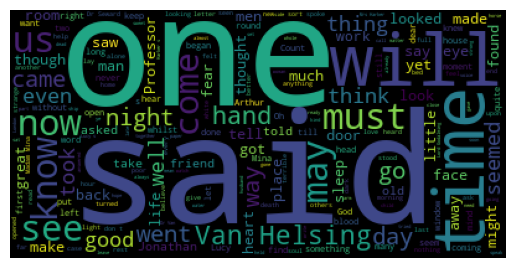

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create an instance of a WordCloud and use the generate method
cloud = WordCloud(random_state = 42).generate(txt)
plt.imshow(cloud)
plt.axis('off');

In [3]:
from wordcloud import STOPWORDS
# define custom stopwords
custom_stopwords = ["said",'will','one', *STOPWORDS]

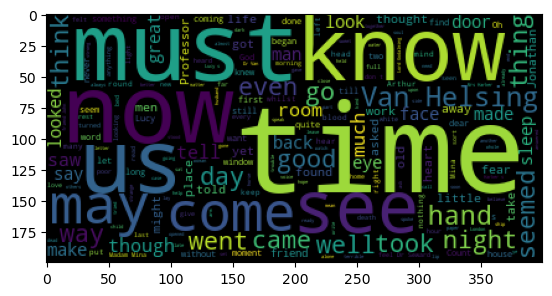

In [4]:
cloud = WordCloud(random_state = 123, stopwords=custom_stopwords).generate(txt)
plt.imshow(cloud);

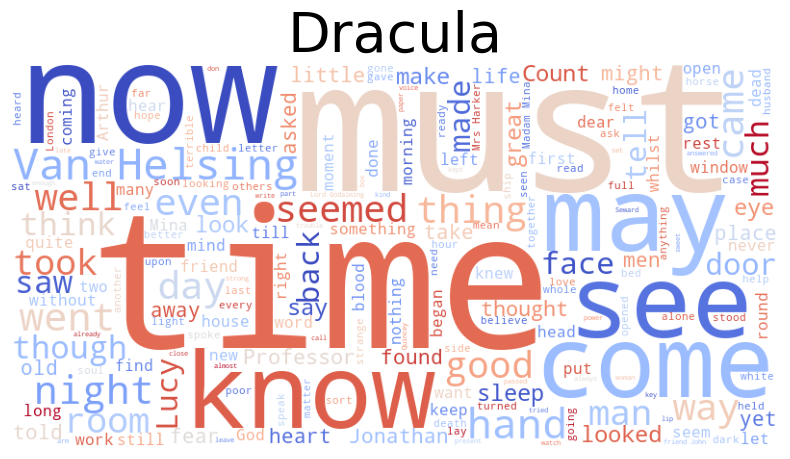

In [5]:
# Create an instance of a WordCloud and use the generate method
cloud = WordCloud(
    random_state=123,
    stopwords = custom_stopwords,
    background_color="white",
    colormap="coolwarm",
    width = 800,
    height = 400,
    min_word_length=3).generate(txt)
plt.figure(figsize = (10, 5))
plt.imshow(cloud)
plt.title('Dracula',fontsize=40)
plt.axis("off");

In [6]:
# Preview first 1,000 characters (printing)
print(txt[:1000])





                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

                            GROSSET & DUNLAP

                              _Publishers_

      Copyright, 1897, in the United States of America, according
                   to Act of Congress, by Bram Stoker

                        [_All rights reserved._]

                      PRINTED IN THE UNITED STATES
                                   AT
               THE COUNTRY LIFE PRESS, GARDEN CITY, N.Y.




                                   TO

                             MY DEAR FRIEND

                               HOMMY-BEG




Contents

CHAPTER I. Jonathan Harker’s Journal
CHAPTER II. Jonathan Harker’s Journal
CHAPTER III. Jonathan Harker’s Journal
CHAPTER IV. Jonathan Harker’s Journal
CHAPTER V. Letters—Lucy and Mina
CHAPTER VI. Mina Murray’s Journal
CHAPTER VII

In [7]:
# Preview first 90 characters (printing)
print(txt[:90])





                                DRACULA

                                  _by_

     


# frequency plot

In [8]:
import spacy
## Load the model and Disable Named Entity Recognizer (too slow)
nlp_model = spacy.load('en_core_web_sm', disable='ner')
nlp_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']

In [9]:
# Create a doc with the nlp pipeline
doc = nlp_model(txt)
type(doc)

spacy.tokens.doc.Doc

In [10]:
doc[4]

by

In [11]:
def preprocess_doc(doc, remove_stopwords=True, remove_punct=True, use_lemmas=False):

    tokens = [ ]
    for token in doc:
        # Check if should remove stopwords and if token is stopword
        if (remove_stopwords == True) and (token.is_stop == True):
            # Continue the loop with the next token
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_punct == True):
            continue
    
        # Check if should remove stopwords and if token is stopword
        if (remove_punct == True) and (token.is_space == True):
            continue
    
        ## Determine final form of output list of tokens/lemmas
        if use_lemmas:
            tokens.append(token.lemma_.lower())
        else:
            tokens.append(token.text.lower())
    return tokens


In [12]:
# Tokenizing, removing stopwords and punctuation
cleaned_tokens = preprocess_doc(doc, remove_stopwords=True,remove_punct=True)
# Lemmatizing, removing stopwords and punctuation
cleaned_lemmas = preprocess_doc(doc, remove_stopwords=True,remove_punct=True, use_lemmas=True)

In [13]:
from nltk.probability import FreqDist
dist = FreqDist(cleaned_tokens)

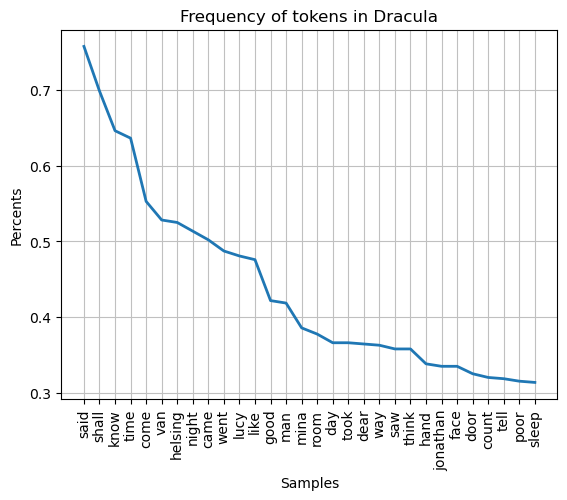

In [15]:
dist.plot(30, title='Frequency of tokens in Dracula', percents=True);

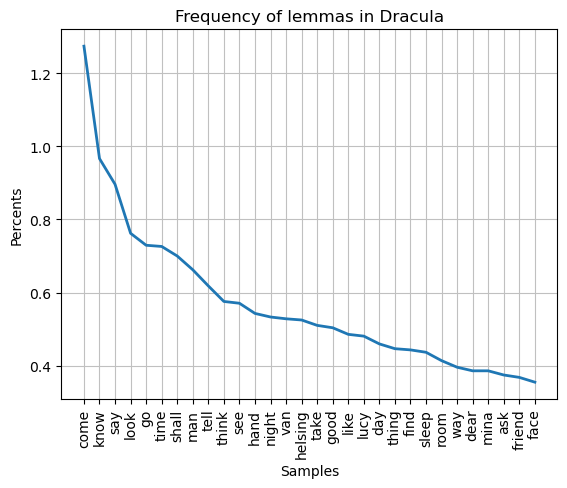

In [16]:
dist = FreqDist(cleaned_lemmas)
dist.plot(30, title='Frequency of lemmas in Dracula', percents=True);